In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, date 
import math

# Dados do estudo, treino e teste
msft = pd.read_csv("MSFT.csv")
# msft = msft.iloc[:,1:8]
msft['Date'] = pd.to_datetime(msft['Date'], format='%Y/%m/%d')
train = msft[msft['Date'].dt.year < 2022]
test = msft[msft['Date'].dt.year == 2022]  # ate SEXYA FEIRA DIA 11/NOV
methods = ['ARIMA', 'exp smoth', 'naive-bayes','XGboost','neural net']

# FORECAST
msft_forecast = pd.read_csv("MSFT_forecast.csv")
# msft = msft.iloc[:,1:8]
msft_forecast['Date'] = pd.to_datetime(msft_forecast['Date'], format='%Y/%m/%d')

# checa estacionariedade
from statsmodels.tsa.stattools import adfuller

result = adfuller(msft['retornos'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# previsoes de cada modelo
arima_data = pd.read_csv("day_errors_model_ARIMA.csv")
exp_data = pd.read_csv("day_errors_model_exp_smoth.csv")
nvbay_data = pd.read_csv("day_errors_model_nvbayes.csv")
xgb_data = pd.read_csv("day_errors_model_xgboost.csv")
nn_data = pd.read_csv("day_errors_model_neuralnet.csv")

# RMSE de cada modelo
arima_rmse = list(pd.read_csv("day_rmse_model_ARIMA.csv")['x'])
exp_rmse = list(pd.read_csv("day_rmse_model_exp_smoth.csv")['x'])
nvbay_rmse = list(pd.read_csv("day_rmse_model_nvbayes.csv")['x'])
xgb_rmse = list(pd.read_csv("day_rmse_model_xgboost.csv")['x'])
nn_rmse = list(pd.read_csv("day_rmse_model_neuralnet.csv")['x'])

# Dicionario de cada modelo com erros diários
days = ['Seg','Ter','Qua','Qui','Sex']

dict_errors_arima = dict(zip(days,arima_rmse))
dict_errors_exp = dict(zip(days,exp_rmse))
dict_errors_nvbay = dict(zip(days,nvbay_rmse))
dict_errors_xgb = dict(zip(days,xgb_rmse))
dict_errors_nn = dict(zip(days,nn_rmse))

# Tempo de ajuste de cada modelo de previsao - CONSTRUIR DT OU DICT
fit_time = {'ARIMA': 2.947, 'exp smoth': 0.453, 'naive-bayes': 2214.92, 'XGboost':33.27, 'neural net': 1884} # from last run vapo

# DT com rmse diario de cada modelo
rmse_methods = pd.DataFrame([arima_rmse, exp_rmse, nvbay_rmse, xgb_rmse, nn_rmse], columns=days, dtype=float)
rmse_methods.index = methods

ADF Statistic: -8.649256
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [ ]:
# Heatmap of daily Root Mean Squared Error by model
ax = sns.heatmap(rmse_methods, annot=False, fmt="d",cmap='RdYlGn')
ax.xaxis.tick_top()
#ax.yticks(rmse_methods['model'], fontname = 'Gabriola', fontsize=4) # nao funcionou
plt.show()

# Heatmap of the error of each day
# this is only arima_data, exp_data ... painted

plt.subplot(2,3,1)
ax = sns.heatmap(arima_data, annot=False, fmt="d",cmap='RdBu')
ax.xaxis.tick_top()
ax.set_title('ARIMA model', fontname = 'Times New Roman')

plt.subplot(2,3,2)
ax = sns.heatmap(exp_data, annot=False, fmt="d",cmap='PiYG', cbar=False)
ax.xaxis.tick_top()
ax.set_title('Exp smoth model', fontname = 'Times New Roman')
plt.show()

plt.subplot(2,3,3)
ax = sns.heatmap(nvbay_data, annot=False, fmt="d",cmap='PiYG', cbar=False)
ax.xaxis.tick_top()
ax.set_title('Naive-Bayes model', fontname = 'Times New Roman')
plt.show()

plt.subplot(2,3,4)
ax = sns.heatmap(xgb_data, annot=False, fmt="d",cmap='PiYG', cbar=False)
ax.xaxis.tick_top()
ax.set_title('XGboost model', fontname = 'Times New Roman')
plt.show()

plt.subplot(2,3,5)
ax = sns.heatmap(nn_data, annot=False, fmt="d",cmap='PiYG', cbar=False)
ax.xaxis.tick_top()
ax.set_title('Neural net model', fontname = 'Times New Roman')
plt.show()

################ Line plot RMSE ##########################
#
# 
with plt.style.context(('bmh')):
    plt.subplot(2,3,1)
    plt.plot(days, arima_rmse, 'rs-', linewidth=0.6, markersize=5)
    plt.grid(color='grey', linewidth=0.8, axis='both', alpha=0.4)
    plt.yticks(np.arange(0.01, 0.044, step=0.004),fontsize=9.2)
    plt.xticks(fontsize=8)
    plt.ylabel('RMSE', fontname='Times New Roman')
    plt.annotate(str(fit_time['ARIMA']) + ' secs',fontsize=11, fontname='impact', xy = ('Sex', dict_errors_nn['Sex']), color ='white', textcoords='axes fraction', xytext=(0.7, 0.85), bbox=dict(facecolor='black', edgecolor='Black', boxstyle='round'))
    plt.title('ARIMA', fontname='Times New Roman')

    plt.subplot(2,3,2)
    plt.plot(days, exp_rmse, 'gs-', linewidth=0.6, markersize=5)
    plt.grid(color='grey', linewidth=0.8, axis='both', alpha=0.4)
    plt.yticks(np.arange(0.01, 0.044, step=0.004),fontsize=9.2)
    plt.xticks(fontsize=8)
    plt.annotate(str(fit_time['exp smoth']) + ' secs',fontsize=11, fontname='impact', xy = ('Sex', dict_errors_nn['Sex']), color ='white', textcoords='axes fraction', xytext=(0.7, 0.85), bbox=dict(facecolor='black', edgecolor='Black', boxstyle='round'))
    plt.title('exp smoth', fontname='Times New Roman')

    plt.subplot(2,3,3)
    plt.plot(days, nvbay_rmse, 'ms-', linewidth=0.6, markersize=5)
    plt.grid(color='grey', linewidth=0.8, axis='both', alpha=0.4)
    plt.yticks(np.arange(0.01, 0.044, step=0.004),fontsize=9.2)
    plt.xticks(fontsize=8)
    plt.annotate(str(fit_time['naive-bayes']) + ' secs',fontsize=11, fontname='impact', xy = ('Sex', dict_errors_nn['Sex']), color ='white', textcoords='axes fraction', xytext=(0.65, 0.87), bbox=dict(facecolor='black', edgecolor='Black', boxstyle='round'))
    plt.title('naive-bayes', fontname='Times New Roman')

    plt.subplot(2,3,4)
    plt.plot(days, xgb_rmse, 'ks-', linewidth=0.6, markersize=5)
    plt.grid(color='grey', linewidth=0.8, axis='both', alpha=0.4)
    plt.yticks(np.arange(0.01, 0.044, step=0.004),fontsize=9.2)
    plt.xticks(fontsize=8)
    plt.ylabel('RMSE', fontname='Times New Roman')
    plt.annotate(str(fit_time['XGboost']) + ' secs',fontsize=11, fontname='impact', xy = ('Sex', dict_errors_nn['Sex']), color ='white', textcoords='axes fraction', xytext=(0.7, 0.85), bbox=dict(facecolor='black', edgecolor='Black', boxstyle='round'))
    plt.title('xgboost', fontname='Times New Roman')

    plt.subplot(2,3,5)
    plt.plot(days, nn_rmse, 'bs-', linewidth=0.6, markersize=5)
    plt.grid(color='grey', linewidth=0.8, axis='both', alpha=0.4)
    plt.yticks(np.arange(0.01, 0.044, step=0.004),fontsize=9.2)
    plt.xticks(fontsize=8)
    plt.annotate(str(fit_time['neural net']) + ' secs',fontsize=11, fontname='impact', xy = ('Sex', dict_errors_nn['Sex']), color ='white', textcoords='axes fraction', xytext=(0.7, 0.85), bbox=dict(facecolor='black', edgecolor='Black', boxstyle='round'))
    plt.title('neural net', fontname='Times New Roman')
    #plt.legend(methods, loc='upper right')

plt.show()

In [ ]:
# treatment to make match ups model x model
wkcnct_arima = pd.DataFrame()
wkcnct_exp = pd.DataFrame()
wkcnct_nvbay = pd.DataFrame()
wkcnct_xgb = pd.DataFrame()
wkcnct_nn = pd.DataFrame()

for i in np.arange(0, 45, step=1):
    #print(i)
    wkcnct_arima = pd.concat([wkcnct_arima, arima_data.iloc[i,:]])
    wkcnct_exp = pd.concat([wkcnct_exp, exp_data.iloc[i,:]])
    wkcnct_nvbay = pd.concat([wkcnct_nvbay, nvbay_data.iloc[i,:]])
    wkcnct_xgb = pd.concat([wkcnct_xgb, xgb_data.iloc[i,:]])
    wkcnct_nn = pd.concat([wkcnct_nn, nn_data.iloc[i,:]])
    
wkcnct_arima.columns = ['ARIMA prev']
wkcnct_exp.columns = ['exp smoth prev']
wkcnct_nvbay.columns = ['nvbay prev']
wkcnct_xgb.columns = ['xgb prev']
wkcnct_nn.columns = ['nn prev']

# wkcnct = pd.concat([wkcnct_arima, wkcnct_exp, wkcnct_nvbay, wkcnct_xgb, wkcnct_nn], axis=1)
wkcnct = pd.concat([wkcnct_arima, wkcnct_exp, wkcnct_nvbay, wkcnct_xgb, wkcnct_nn], axis=1).dropna()
wkcnct['test returns'] = list(test['retornos'])
wkcnct['days'] = list(test['wdayname']) # CERTINHO
wkcnct['date'] = list(test['Date'])

# this allow us to make a plot of the forecast of two or more models
fig, axes = plt.subplots()
axes.plot(wkcnct['date'], wkcnct['test returns'], color='navy', linestyle='-', linewidth=0.5)
axes.plot(wkcnct['date'], wkcnct['ARIMA prev'], color='firebrick', linestyle='-', linewidth=0.7)
#plt.plot(wkcnct['date'], wkcnct['exp smoth prev'], color='forestgreen', linestyle=':', linewidth=0.7)
axes.legend(['Test', 'ARIMA', 'forecast'], loc='upper left')  # , 'exp smoth', 'XGboost'
axes.grid(color='grey', linewidth=0.3, axis='both', alpha=0.2)
axes.set_yticks(np.arange(-0.1,0.12,0.04), fontsize=6)
#plt.xticks(list(wkcnct['month'].unique())) # the intention was plot the month name
plt.show()

#and
fig, axes = plt.subplots()
axes.plot(wkcnct[wkcnct['date'].dt.month == 1]['date'], wkcnct[wkcnct['date'].dt.month == 1]['test returns'], color='blue', linestyle='-', linewidth=0.5)
axes.plot(wkcnct[wkcnct['date'].dt.month == 1]['date'], wkcnct[wkcnct['date'].dt.month == 1]['ARIMA prev'], color='red', linestyle='-', linewidth=0.7)
axes.plot(wkcnct[wkcnct['date'].dt.month == 1]['date'], wkcnct[wkcnct['date'].dt.month == 1]['exp smoth prev'], color='limegreen', linestyle='-', linewidth=0.7)
axes.plot(wkcnct['date'], wkcnct['xgb prev'], 'k:', linewidth=0.7)
axes.legend(['Test', 'ARIMA', 'exp smoth prev', 'xgbteste'], loc='upper left')  # , 'exp smoth', 'XGboost'
axes.grid(color='grey', linewidth=0.3, axis='both', alpha=0.2)
axes.set_yticks(np.arange(-0.1,0.12,0.04), fontsize=6)
#plt.xticks(list(map(lambda x: x.strftime('%d'), wkcnct[wkcnct['date'].dt.month == 1]['date']))) # Resolve isso para plotar meses
#axes.xaxis.set_major_formatter(DateFormatter("%m/%d"))
plt.show()

# Box and Violin plots of one vs another model
with plt.style.context(('bmh')):

    plt.subplot(2,2,1)
    sns.boxplot(data=wkcnct, y='ARIMA prev', x='days', hue='days', palette='Accent', width=0.6, dodge=False)
    plt.yticks(np.arange(-0.1,0.12,0.04), fontsize=10)
    plt.grid(color='grey', linewidth=0.4, axis='y', alpha=0.3)
    plt.title('XGboost model', fontname='Times New Roman')
    plt.ylabel('Errors', rotation=90)
    plt.xlabel(None)
    plt.legend(loc='lower left', prop={'size': 7})


    plt.subplot(2,2,2)
    sns.boxplot(data=wkcnct, y='exp smoth prev', x='days', hue='days', palette='Accent', width=0.6, dodge=False)
    plt.yticks(np.arange(-0.1,0.12,0.04), fontsize=10)
    plt.grid(color='grey', linewidth=0.4, axis='y', alpha=0.3)
    plt.title('Neural net model', fontname='Times New Roman')
    plt.ylabel(None)
    plt.xlabel(None)
    plt.legend(loc='lower left', prop={'size': 7})

    plt.subplot(2,2,3)
    sns.violinplot(data=wkcnct, y='ARIMA prev', x='days', hue='days', palette='Set3', width=0.6, dodge=False)
    plt.yticks(np.arange(-0.1,0.12,0.04), fontsize=10)
    plt.grid(color='grey', linewidth=0.4, axis='y', alpha=0.3)
    #plt.title('XGboost model', fontname='Times New Roman')
    plt.ylabel('Errors', rotation=90)
    plt.xlabel(None)
    plt.legend(loc='lower left', prop={'size': 7})

    plt.subplot(2,2,4)
    sns.violinplot(data=wkcnct, y='exp smoth prev', x='days', hue='days', palette='Set3', width=0.6, dodge=False)
    plt.yticks(np.arange(-0.1,0.12,0.04), fontsize=10)
    plt.grid(color='grey', linewidth=0.4, axis='y', alpha=0.3)
    #plt.title('Neural net model', fontname='Times New Roman')
    plt.ylabel(None)
    plt.xlabel(None)
    plt.legend(loc='lower left', prop={'size': 7})

plt.show()

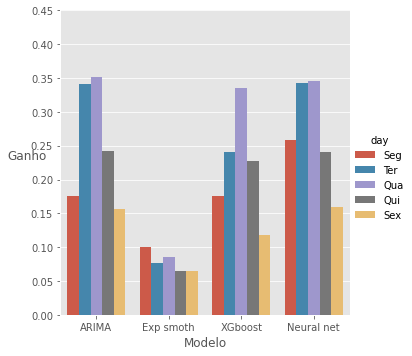

In [28]:
# models gain x naive-bayes
#treatment
arima_gain = [1-x/y for (x,y) in zip(arima_rmse, nvbay_rmse)]
exp_gain = [1-x/y for (x,y) in zip(exp_rmse, nvbay_rmse)]
xgb_gain = [1-x/y for (x,y) in zip(xgb_rmse, nvbay_rmse)]
neural_gain = [1-x/y for (x,y) in zip(nn_rmse, nvbay_rmse)]
gain_vec = arima_gain + exp_gain + xgb_gain + neural_gain

day = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex']
day = day*4
models_names = ['ARIMA', 'ARIMA', 'ARIMA', 'ARIMA', 'ARIMA', 'Exp smoth', 'Exp smoth', 'Exp smoth', 'Exp smoth', 'Exp smoth', 'XGboost', 'XGboost', 'XGboost', 'XGboost', 'XGboost', 'Neural net', 'Neural net', 'Neural net', 'Neural net', 'Neural net']
#
# THIS IS THE CHART OF GAIN x Naive-bayes
df = pd.DataFrame({'gain': gain_vec, 'model': models_names, 'day': day})
with plt.style.context(('ggplot')):
    ax = sns.catplot(x='model', y='gain', hue='day', data=df, kind='bar')
    # plt.title("Taxa de ganho de cada modelo\n em relação ao modelo Benchmarking(Naive-Bayes)")
    plt.xlabel('Modelo')
    plt.ylabel('Gain', rotation=90)
    plt.yticks(np.arange(0, 0.50, step=0.05))
    #plt.margins(y=0.1)
    # for container in ax.containers:
    #     ax.bar_label(container, fmt='%.f%%') # label the bars with the value
plt.show()
